# Publication figures for competition use case - Multiome data
Present results as ranks instead of absolute values.

Per metric, mean across 5 random seeds per model. Overall mean: mean across means of individual metrics.

Anaconda environment: export_styled_dfs


With matplotlib backend,  currently dataframe_image cannot export captions, vertical lines and the label of the top column header gets duplicated -> manual postprocessing in Keynote. 

Hack: renaming asw_batch to lLISI so iLISI and asw_batch take up the same width. In postprocessing lLISI will be named back to the correct asw_batch.

Abbreviation: Competition use case: CU_base

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm
import dataframe_image as dfi

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size'] = '12'

In [4]:
# Need to remove chached fonts

In [5]:
! rm ~/.cache/matplotlib -rf

In [6]:
font_dirs = ["miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [7]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [8]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [9]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

In [10]:
plt.rcParams['font.size']

12.0

# Multiome
All these models no cap on epochs!
- CVAE 5 seeds (sample)
- BAVAE 5 seeds (sample)
- BAVAE 1 seed (site)
- BAVAE concat 5 seeds (sample)
- BAVAE rna only 5 seeds (sample) (20 dims)
- BAVAE atac only 5 seeds (sample) (20 dims)
- VAE 1 seed
- MultiVI default 16 dims  5 seeds (sample) 
- MultiVI no filtering 16 dims 5 seeds (sample)
- Winner 64 dims 5 seeds (sample)
- CDVAE 5 seeds (sample) - conditional decoder only
- CEVAE 5 seeds (sample) - conditional encoder only
- batchVAE 5 seeds (sample) - only batch specific parameters
- scVI bn 5 seeds (sample)
- scVI ln 5 seeds (sample)
- scVI ln 5 seeds (sample) (20 dims)

## Adversarial investigations
- AVAE_x1 5 seeds (sample)
- AVAE_x50 5 seeds (sample)
- AVAE_x100 5 seeds (sample)
- AVAE_x1000 5 seeds (sample)
- BAVAE_x50 5 seeds (sample)
- BAVAE_x100 5 seeds (sample)
- BAVAE_x1000 5 seeds (sample)
- BAVAE_x5 5 seeds (sample) (revisions r1)
- BAVAE_x10 5 seeds (sample) (revisions r1)
- BAVAE_x25 5 seeds (sample) (revisions r1)

## Subsampling
- BAVAE rna only 1 seed (sample) (10 dims) (this is the counterpart for the subsamles atac models for the concat models!)
- BAVAE atac only 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE concat 25% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac only 10% 1 seed, 5 different atac subsamples (sample)
- BAVAE atac 10% 1 seed, 5 different atac subsamples (sample)
- BAVAE concat 10% 1 seed, 5 different atac subsamples (sample)
- MultiVI  10% 1 seed, 5 different atac subsamples (sample)
- MultiVI  20% 1 seed, 5 different atac subsamples (sample)


Not that these moodels were trained with a different number of epochs as for challenge (upper limit set to X to not hit the time limit for the run).



In [11]:
# Multiome

In [12]:
scores = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models.csv", index_col=0)

In [13]:
scores_AVAE_1000 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x1000.csv", index_col=0)

In [14]:
scores_AVAE_100 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x100.csv", index_col=0)

In [15]:
scores_AVAE_50 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_all_models_x50_x1.csv", index_col=0)

In [16]:
scores_subsampling_10 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_atac_subsampling_10%_scores.csv", index_col=0)

In [17]:
scores_subsampling = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_atac_subsampling_scores.csv", index_col=0)

In [18]:
scores_MultiVI_no_filt = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_no_filtering_20222006.csv", index_col=0)

In [19]:
# fixed = pd.read_csv("Evaluation/scores/Multiome/batch_removal_scores_correction_CVAE.csv", index_col=0)

In [20]:
scores_MultiVI_subsampling = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_subsampling_20222307.csv", index_col=0)

In [21]:
scores_CDVAE = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_CDVAEs_20222508.csv", index_col=0)

In [22]:
scores_CEVAE_batchVAE = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_CEVAEs_batchVAEs_20222608.csv", index_col=0)

In [23]:
scores_scVI = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_scVIs_20220609.csv", index_col=0)

In [24]:
scores_scVI_20dims = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_scVI_ln_20_dims_20221909.csv", index_col=0)

In [25]:
scores_r1 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_adversary_range_revisons_r1_20232410.csv", index_col=0)

In [26]:
scores = pd.concat([scores, scores_AVAE_1000, scores_AVAE_100, scores_AVAE_50, scores_subsampling, scores_subsampling_10, scores_MultiVI_no_filt, scores_MultiVI_subsampling, scores_CDVAE, scores_CEVAE_batchVAE, scores_scVI, scores_scVI_20dims, scores_r1], axis=1)


In [27]:
scores

,VAE_100_seed_0,BAVAE_site_100_seed_0,BAVAE_sample_100_seed_0,CVAE_sample_100_seed_0,BAVAE_sample_100_concat_seed_0,MultiVI_seed_0,Winner_Multiome_online_seed_0,BAVAE_sample_100_rna_only_seed_0_20dims,BAVAE_sample_100_atac_only_seed_0_20dims,BAVAE_sample_100_seed_994,...,BAVAE_sample_100_x10.0_seed_0,BAVAE_sample_100_x10.0_seed_994,BAVAE_sample_100_x10.0_seed_236,BAVAE_sample_100_x10.0_seed_71,BAVAE_sample_100_x10.0_seed_415,BAVAE_sample_100_x25.0_seed_0,BAVAE_sample_100_x25.0_seed_994,BAVAE_sample_100_x25.0_seed_236,BAVAE_sample_100_x25.0_seed_71,BAVAE_sample_100_x25.0_seed_415
dims,20.000000,20.000000,20.000000,20.000000,20.000000,16.000000,64.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
iLISI_batch,0.064538,0.181652,0.278258,0.278950,0.275907,0.304715,0.172951,0.287947,0.309809,0.283846,...,0.320414,0.316732,0.317886,0.318417,0.318063,0.320355,0.319397,0.317181,0.316866,0.318037
cLISI_full,0.996230,0.995128,0.994862,0.994930,0.994641,0.993427,0.986050,0.993487,0.991430,0.994848,...,0.994116,0.994695,0.994413,0.994434,0.994804,0.993945,0.993473,0.993092,0.993073,0.993895
asw_batch,0.854741,0.870043,0.862412,0.867761,0.876146,0.843338,0.933637,0.866266,0.836155,0.855988,...,0.864810,0.859502,0.863878,0.863381,0.858199,0.867019,0.869415,0.872167,0.868955,0.868432
asw_label,0.557622,0.580742,0.597651,0.597209,0.588137,0.580226,0.527120,0.599591,0.595379,0.597820,...,0.589355,0.599895,0.601315,0.596586,0.593966,0.602630,0.594096,0.583413,0.581542,0.592151
cc_cons,0.885301,0.844090,0.821761,0.853588,0.768055,0.753206,0.797036,0.911111,0.769118,0.793428,...,0.800673,0.852032,0.846687,0.833863,0.872393,0.837768,0.832218,0.847483,0.848029,0.854856
graph_conn,0.962194,0.968775,0.963022,0.963548,0.960315,0.962565,0.976201,0.966779,0.942365,0.966483,...,0.961543,0.960037,0.963536,0.960595,0.960045,0.960876,0.962227,0.960126,0.959508,0.963330
nmi,0.665860,0.771407,0.776813,0.770447,0.770930,0.743452,0.749142,0.777652,0.746651,0.757215,...,0.772819,0.764585,0.767947,0.763056,0.768838,0.771476,0.758834,0.770696,0.754230,0.763163
ti_cons_batch_gex,0.960963,0.963448,0.969973,0.966801,0.967869,0.963725,0.953171,0.977416,0.941312,0.965168,...,0.969380,0.969446,0.965712,0.949984,0.963216,0.963075,0.966662,0.969109,0.970434,0.965724
ti_cons_batch_adt_atac,0.845086,0.852838,0.858047,0.850423,0.859813,0.854514,0.828871,0.858261,0.840976,0.852857,...,0.860673,0.857735,0.851467,0.845581,0.853498,0.851608,0.856858,0.854886,0.856838,0.860953


In [28]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample", "ti_cons_batch_mean": "ti_cons"}, inplace=True)

<Axes: >

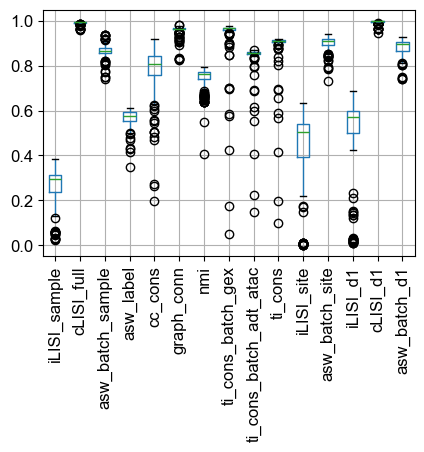

In [29]:
scores.drop("dims").T.boxplot(rot=90)

In [30]:
scores.shape

(16, 163)

In [31]:
scores = scores.T

In [32]:
scores['seed'] = scores.index

In [33]:
scores['seed'] = scores['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

In [34]:
def map_names(x):
    return 'scVI bn' if 'scVI_bn' in x else \
                                   'scVI ln (20 dims)' if (('scVI_ln' in x) & ('20dims' in x)) else \
                                   'scVI ln' if 'scVI_ln' in x else \
                                   'Liam CDVAE' if 'CDVAE' in x else \
                                   'Liam CEVAE' if 'CEVAE' in x else \
                                   'Liam batchVAE' if 'batchVAE' in x else \
                                   'Liam atac only (10 dims, 25% atac)' if '25_atac_only' in x else \
                                   'Liam concat (25% atac)' if '25_concat' in x else \
                                   'MultiVI (25% atac)' if 'MultiVI_25' in x else \
                                   'Liam (25% atac)' if '25_' in x else \
                                   'Liam atac only (10 dims, 10% atac)' if '10_atac_only' in x else \
                                   'Liam concat (10% atac)' if '10_concat' in x else \
                                   'Liam (10% atac)' if 'sample_10_seed' in x else \
                                   'Liam rna only (10 dims)' if ('BAVAE_sample_100_rna_only_seed_0' in x) & ('20dims' not in x) else \
                                   'Liam x1000' if 'BAVAE_sample_100_x1000' in x else \
                                   'Liam AVAE x1000' if 'AVAE_sample_100_x1000' in x else \
                                   'Liam x100' if 'BAVAE_sample_100_x100' in x else \
                                   'Liam AVAE x100' if 'AVAE_sample_100_x100' in x else \
                                   'Liam x50' if 'BAVAE_sample_100_x50' in x else \
                                   'Liam AVAE x50' if 'AVAE_sample_100_x50' in x else \
                                   'Liam x25' if 'BAVAE_sample_100_x25' in x else \
                                   'Liam x10' if 'BAVAE_sample_100_x10' in x else \
                                   'Liam x5' if 'BAVAE_sample_100_x5' in x else \
                                   'Liam AVAE x1' if 'AVAE_sample_100_x1' in x else \
                                   'MultiVI (no feature preselection)' if 'MultiVI_no_filt' in x else \
                                   'MultiVI (10% atac)' if 'MultiVI_10' in x else \
                                   'MultiVI' if 'MultiVI' in x else \
                                   'LSL_AE' if 'Winner' in x else \
                                   'Liam site' if 'site' in x else  \
                                   'Liam rna only' if ('rna' in x) & ('20dims' in x) else  \
                                   'Liam atac only' if ('atac' in x) & ('20dims' in x) else \
                                   'Liam concat' if 'concat' in x else  \
                                   'Liam CVAE' if 'CVAE' in x else  \
                                   'Liam' if 'BAVAE' in x else  \
                                   'Liam VAE'

In [35]:
scores['Model'] = scores.index.map(lambda x:
                                   map_names(x))

In [36]:
scores['Model'].value_counts()

Model
Liam                                  5
Liam concat                           5
Liam CVAE                             5
Liam atac only (10 dims, 10% atac)    5
Liam (10% atac)                       5
MultiVI                               5
LSL_AE                                5
Liam rna only                         5
Liam atac only                        5
Liam x1000                            5
Liam AVAE x1000                       5
Liam x100                             5
Liam AVAE x100                        5
Liam x50                              5
Liam AVAE x50                         5
Liam AVAE x1                          5
Liam atac only (10 dims, 25% atac)    5
Liam (25% atac)                       5
Liam concat (25% atac)                5
scVI ln (20 dims)                     5
Liam batchVAE                         5
Liam concat (10% atac)                5
MultiVI (no feature preselection)     5
MultiVI (25% atac)                    5
MultiVI (10% atac)                

In [37]:
scores.columns

Index(['dims', 'iLISI_sample', 'cLISI_full', 'asw_batch_sample', 'asw_label',
       'cc_cons', 'graph_conn', 'nmi', 'ti_cons_batch_gex',
       'ti_cons_batch_adt_atac', 'ti_cons', 'iLISI_site', 'asw_batch_site',
       'iLISI_d1', 'cLISI_d1', 'asw_batch_d1', 'seed', 'Model'],
      dtype='object')

In [38]:
scores.drop(['dims', 'cLISI_full', 'ti_cons_batch_gex', 'ti_cons_batch_adt_atac', 'cLISI_d1'], axis=1, inplace=True)

In [39]:
scores = scores[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample', 'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1', 'seed', 'Model']]

In [40]:
scores.seed.value_counts()

seed
0       27
994     24
236     24
71      24
415     24
8831     8
234      8
11       8
9631     8
94       8
Name: count, dtype: int64

In [41]:
print(scores.groupby('Model')['seed'].value_counts().to_string())

Model                               seed
LSL_AE                              0       1
                                    236     1
                                    415     1
                                    71      1
                                    994     1
Liam                                0       1
                                    236     1
                                    415     1
                                    71      1
                                    994     1
Liam (10% atac)                     234     1
                                    8831    1
                                    94      1
                                    9631    1
                                    11      1
Liam (25% atac)                     11      1
                                    234     1
                                    8831    1
                                    94      1
                                    9631    1
Liam AVAE x1                        0  

In [42]:
seeds_default = ['0', '994', '236', '71', '415']

In [43]:
list_of_bio_metrics = ['nmi', 'asw_label', 'cc_cons', 'ti_cons'] 

In [44]:
list_of_batch_metrics = [ 'iLISI_sample', 'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1']

In [45]:
def get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=None, rank_method='min'):
    
    scores_bio = scores[list_of_bio_metrics + ['seed', 'Model']]
    scores_batch = scores[list_of_batch_metrics + ['seed', 'Model']]
    
    scores_bio = scores_bio[scores_bio['seed'].isin(list_of_seeds)]
    scores_batch = scores_batch[scores_batch['seed'].isin(list_of_seeds)]
    
    if list_of_models is not None:
        scores_bio = scores_bio[scores_bio['Model'].isin(list_of_models)]
        scores_batch = scores_batch[scores_batch['Model'].isin(list_of_models)]

    
    scores_bio_ranks = scores_bio.groupby('seed').rank(axis=0, ascending=False, method=rank_method)
    scores_batch_ranks = scores_batch.groupby('seed').rank(axis=0, ascending=False, method=rank_method)

            
    
    scores_bio_ranks['seed'] = scores_bio_ranks.index
    scores_batch_ranks['seed'] = scores_batch_ranks.index


    scores_bio_ranks['seed'] = scores_bio_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])
    scores_batch_ranks['seed'] = scores_batch_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

    
    scores_bio_ranks['Model'] = scores_bio_ranks.index.map(lambda x:
                                       map_names(x))
    scores_batch_ranks['Model'] = scores_batch_ranks.index.map(lambda x:
                                       map_names(x))
    
    scores_bio_ranks_mean = scores_bio_ranks.drop('seed', axis=1).groupby('Model').mean()
    scores_batch_ranks_mean = scores_batch_ranks.drop('seed', axis=1).groupby('Model').mean()

    scores_bio_ranks_mean['mean'] = scores_bio_ranks_mean.mean(axis=1)
    scores_batch_ranks_mean['mean'] = scores_batch_ranks_mean.mean(axis=1)


    scores_bio_ranks_mean = pd.concat([scores_bio_ranks_mean], keys=["Bio-conservation"], names=["Category"], axis=1)


    scores_batch_ranks_mean = pd.concat([scores_batch_ranks_mean], keys=["Batch correction"], names=["Category"], axis=1)

    ranks_df = pd.merge(scores_bio_ranks_mean, scores_batch_ranks_mean, left_index=True, right_index=True)

    bio_keys = scores_bio_ranks_mean.columns.values.tolist()

    batch_keys = scores_batch_ranks_mean.columns.values.tolist()

    return ranks_df, bio_keys, batch_keys

## Figure 3
Multiome:
- Liam
- MultiVI
- LSL_AE

In [46]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, seeds_default, list_of_models=['Liam', 'MultiVI', 'LSL_AE'], rank_method='min')

In [47]:
ranks_df

Category Bio-conservation                                Batch correction  \
                      nmi asw_label cc_cons ti_cons mean     iLISI_sample   
Model                                                                       
LSL_AE                2.8       3.0     1.2     3.0  2.5              3.0   
Liam                  1.0       1.0     2.0     1.2  1.3              2.0   
MultiVI               2.2       2.0     2.8     1.8  2.2              1.0   

Category                                                       
         asw_batch_site iLISI_site asw_batch_d1 iLISI_d1 mean  
Model                                                          
LSL_AE              3.0        3.0          3.0      3.0  3.0  
Liam                1.0        2.0          1.0      2.0  1.6  
MultiVI             2.0        1.0          2.0      1.0  1.4

In [48]:
ranks_df_batch = ranks_df[batch_keys]

In [49]:
ranks_df_batch.index.name = None 

In [50]:
ranks_df_batch

Category Batch correction                                                     
             iLISI_sample asw_batch_site iLISI_site asw_batch_d1 iLISI_d1 mean
LSL_AE                3.0            3.0        3.0          3.0      3.0  3.0
Liam                  2.0            1.0        2.0          1.0      2.0  1.6
MultiVI               1.0            2.0        1.0          2.0      1.0  1.4

In [51]:
ranks_df_batch.columns = ranks_df_batch.columns.droplevel(level=0)

In [52]:
ranks_df_batch

,iLISI_sample,asw_batch_site,iLISI_site,asw_batch_d1,iLISI_d1,mean
LSL_AE,3.0,3.0,3.0,3.0,3.0,3.0
Liam,2.0,1.0,2.0,1.0,2.0,1.6
MultiVI,1.0,2.0,1.0,2.0,1.0,1.4


In [53]:
# rename columns, asw_batch gets named lLISI such that it has the same width as iLISI and gets postprocessed

In [54]:
ranks_df_batch.columns = pd.MultiIndex.from_tuples((("iLISI", "sample"), ("lLISI", "site"), ("iLISI", "site"), ("lLISI", "d1"), ("iLISI", "d1"), ("", "mean")))

In [55]:
ranks_df_batch

,iLISI,lLISI,iLISI,lLISI,iLISI,
,sample,site,site,d1,d1,mean
LSL_AE,3.0,3.0,3.0,3.0,3.0,3.0
Liam,2.0,1.0,2.0,1.0,2.0,1.6
MultiVI,1.0,2.0,1.0,2.0,1.0,1.4


In [56]:
# sorting
ranks_df_batch = ranks_df_batch[['lLISI', 'iLISI', '']].loc[['Liam', 'MultiVI', 'LSL_AE']]


In [57]:
ranks_df_batch

lLISI       iLISI               
         site   d1 sample site   d1 mean
Liam      1.0  1.0    2.0  2.0  2.0  1.6
MultiVI   2.0  2.0    1.0  1.0  1.0  1.4
LSL_AE    3.0  3.0    3.0  3.0  3.0  3.0

In [58]:
index_names = {
    'selector': '.index_name',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}


content = {'selector': 'td', 'props': 'text-align: center; font-weight: normal; font-size: 10pt'}

title = {'selector': 'caption',
    'props': [
        ('font-family', 'Arial'),
        ('font-weight', 'bold'),
        ('font-size', '14px')
    ]}

In [59]:
df_styled_batch = ranks_df_batch.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("", "mean")], vmin=1, vmax=3)


In [60]:
df_styled_batch

In [61]:
# dfi.export(df_styled_batch, 'figures/CU_base_batch_removal_ranks.pdf', table_conversion='matplotlib', dpi=600, fontsize=8)

In [62]:
dfi.export(df_styled_batch, 'figures/CU_base_batch_removal_ranks_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)

In [63]:
ranks_df_bio = ranks_df[bio_keys]

In [64]:
ranks_df_bio.index.name = None 

In [65]:
ranks_df_bio.columns = ranks_df_bio.columns.droplevel(level=0)

In [66]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
LSL_AE,2.8,3.0,1.2,3.0,2.5
Liam,1.0,1.0,2.0,1.2,1.3
MultiVI,2.2,2.0,2.8,1.8,2.2


In [67]:
# sorting
ranks_df_bio = ranks_df_bio.loc[['Liam', 'MultiVI', 'LSL_AE']]


In [68]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam,1.0,1.0,2.0,1.2,1.3
MultiVI,2.2,2.0,2.8,1.8,2.2
LSL_AE,2.8,3.0,1.2,3.0,2.5


In [69]:
df_styled_bio = ranks_df_bio.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("mean")], vmin=1, vmax=3)


In [70]:
df_styled_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam,1.0,1.0,2.0,1.2,1.3
MultiVI,2.2,2.0,2.8,1.8,2.2
LSL_AE,2.8,3.0,1.2,3.0,2.5


In [71]:
# dfi.export(df_styled_bio, 'figures/CU_base_bio_cons_ranks.pdf', table_conversion='matplotlib', dpi=600, fontsize=8)

In [72]:
dfi.export(df_styled_bio, 'figures/CU_base_bio_cons_ranks_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)

## Figure 4
Multiome:
- Liam x1
- Liam x5
- Liam x10
- Liam x25
- Liam x50
- Liam x100
- Liam x1000

In [46]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, seeds_default, list_of_models=['Liam',\
                                                                                                                                   'Liam x5',\
                                                                                                                                   'Liam x10',\
                                                                                                                                   'Liam x25',\
                                                                                                                                   'Liam x50',\
                                                                                                                                   'Liam x100',\
                                                                                                                                   'Liam x1000'\
                                                                                                                                  ], rank_method='min')

In [47]:
ranks_df.rename(index={'Liam': 'Liam x1'}, inplace=True)

In [48]:
ranks_df

Category   Bio-conservation                                 Batch correction  \
                        nmi asw_label cc_cons ti_cons  mean     iLISI_sample   
Model                                                                          
Liam x1                 2.6       1.6     4.8     4.6  3.40              6.0   
Liam x10                2.2       2.2     3.2     4.4  3.00              2.2   
Liam x100               6.4       6.0     4.6     4.0  5.25              4.8   
Liam x1000              5.2       7.0     7.0     6.4  6.40              7.0   
Liam x25                3.4       3.4     3.0     3.6  3.35              2.6   
Liam x5                 3.4       2.8     2.2     2.4  2.70              3.8   
Liam x50                4.8       5.0     3.2     2.6  3.90              1.6   

Category                                                          
           asw_batch_site iLISI_site asw_batch_d1 iLISI_d1  mean  
Model                                                             
Liam x1               5.8        6.0          6.0      6.0  5.96  
Liam x10              4.0        2.2          4.0      1.6  2.80  
Liam x100             1.4        4.6          3.2      4.8  3.76  
Liam x1000            7.0        7.0          7.0      7.0  7.00  
Liam x25              3.2        2.0          2.4      2.4  2.52  
Liam x5               5.0        4.4          2.8      4.2  4.04  
Liam x50              1.6        1.8          2.6      2.0  1.92

In [49]:
ranks_df_batch = ranks_df[batch_keys]

In [50]:
ranks_df_batch.index.name = None 

In [51]:
ranks_df_batch

Category   Batch correction                                                  \
               iLISI_sample asw_batch_site iLISI_site asw_batch_d1 iLISI_d1   
Liam x1                 6.0            5.8        6.0          6.0      6.0   
Liam x10                2.2            4.0        2.2          4.0      1.6   
Liam x100               4.8            1.4        4.6          3.2      4.8   
Liam x1000              7.0            7.0        7.0          7.0      7.0   
Liam x25                2.6            3.2        2.0          2.4      2.4   
Liam x5                 3.8            5.0        4.4          2.8      4.2   
Liam x50                1.6            1.6        1.8          2.6      2.0   

Category          
            mean  
Liam x1     5.96  
Liam x10    2.80  
Liam x100   3.76  
Liam x1000  7.00  
Liam x25    2.52  
Liam x5     4.04  
Liam x50    1.92

In [52]:
ranks_df_batch.columns = ranks_df_batch.columns.droplevel(level=0)

In [53]:
ranks_df_batch

,iLISI_sample,asw_batch_site,iLISI_site,asw_batch_d1,iLISI_d1,mean
Liam x1,6.0,5.8,6.0,6.0,6.0,5.96
Liam x10,2.2,4.0,2.2,4.0,1.6,2.80
Liam x100,4.8,1.4,4.6,3.2,4.8,3.76
Liam x1000,7.0,7.0,7.0,7.0,7.0,7.00
Liam x25,2.6,3.2,2.0,2.4,2.4,2.52
Liam x5,3.8,5.0,4.4,2.8,4.2,4.04
Liam x50,1.6,1.6,1.8,2.6,2.0,1.92


In [54]:
# rename columns, asw_batch gets named lLISI such that it has the same width as iLISI and gets postprocessed

In [55]:
ranks_df_batch.columns = pd.MultiIndex.from_tuples((("iLISI", "sample"), ("lLISI", "site"), ("iLISI", "site"), ("lLISI", "d1"), ("iLISI", "d1"), ("", "mean")))

In [56]:
ranks_df_batch

,iLISI,lLISI,iLISI,lLISI,iLISI,
,sample,site,site,d1,d1,mean
Liam x1,6.0,5.8,6.0,6.0,6.0,5.96
Liam x10,2.2,4.0,2.2,4.0,1.6,2.80
Liam x100,4.8,1.4,4.6,3.2,4.8,3.76
Liam x1000,7.0,7.0,7.0,7.0,7.0,7.00
Liam x25,2.6,3.2,2.0,2.4,2.4,2.52
Liam x5,3.8,5.0,4.4,2.8,4.2,4.04
Liam x50,1.6,1.6,1.8,2.6,2.0,1.92


In [57]:
# sorting
ranks_df_batch = ranks_df_batch[['lLISI', 'iLISI', '']].loc[['Liam x1',\
                                                             'Liam x5',\
                                                             'Liam x10',\
                                                             'Liam x25',\
                                                             'Liam x50',\
                                                             'Liam x100',\
                                                             'Liam x1000']]


In [58]:
ranks_df_batch

lLISI       iLISI                
            site   d1 sample site   d1  mean
Liam x1      5.8  6.0    6.0  6.0  6.0  5.96
Liam x5      5.0  2.8    3.8  4.4  4.2  4.04
Liam x10     4.0  4.0    2.2  2.2  1.6  2.80
Liam x25     3.2  2.4    2.6  2.0  2.4  2.52
Liam x50     1.6  2.6    1.6  1.8  2.0  1.92
Liam x100    1.4  3.2    4.8  4.6  4.8  3.76
Liam x1000   7.0  7.0    7.0  7.0  7.0  7.00

In [59]:
index_names = {
    'selector': '.index_name',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}


content = {'selector': 'td', 'props': 'text-align: center; font-weight: normal; font-size: 10pt'}

title = {'selector': 'caption',
    'props': [
        ('font-family', 'Arial'),
        ('font-weight', 'bold'),
        ('font-size', '14px')
    ]}

In [60]:
df_styled_batch = ranks_df_batch.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("", "mean")], vmin=1, vmax=7)


In [61]:
df_styled_batch

In [62]:
dfi.export(df_styled_batch, 'figures/CU_base_scaling_batch_removal_ranks_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)

In [63]:
ranks_df_bio = ranks_df[bio_keys]

In [64]:
ranks_df_bio.index.name = None 

In [65]:
ranks_df_bio.columns = ranks_df_bio.columns.droplevel(level=0)

In [66]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam x1,2.6,1.6,4.8,4.6,3.40
Liam x10,2.2,2.2,3.2,4.4,3.00
Liam x100,6.4,6.0,4.6,4.0,5.25
Liam x1000,5.2,7.0,7.0,6.4,6.40
Liam x25,3.4,3.4,3.0,3.6,3.35
Liam x5,3.4,2.8,2.2,2.4,2.70
Liam x50,4.8,5.0,3.2,2.6,3.90


In [67]:
# sorting
ranks_df_bio = ranks_df_bio.loc[['Liam x1',\
                                                                                                                                   'Liam x5',\
                                                                                                                                   'Liam x10',\
                                                                                                                                   'Liam x25',\
                                                                                                                                   'Liam x50',\
                                                                                                                                   'Liam x100',\
                                                                                                                                   'Liam x1000']]


In [68]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam x1,2.6,1.6,4.8,4.6,3.40
Liam x5,3.4,2.8,2.2,2.4,2.70
Liam x10,2.2,2.2,3.2,4.4,3.00
Liam x25,3.4,3.4,3.0,3.6,3.35
Liam x50,4.8,5.0,3.2,2.6,3.90
Liam x100,6.4,6.0,4.6,4.0,5.25
Liam x1000,5.2,7.0,7.0,6.4,6.40


In [69]:
df_styled_bio = ranks_df_bio.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("mean")], vmin=1, vmax=7)


In [70]:
df_styled_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam x1,2.6,1.6,4.8,4.6,3.4
Liam x5,3.4,2.8,2.2,2.4,2.7
Liam x10,2.2,2.2,3.2,4.4,3.0
Liam x25,3.4,3.4,3.0,3.6,3.4
Liam x50,4.8,5.0,3.2,2.6,3.9
Liam x100,6.4,6.0,4.6,4.0,5.2
Liam x1000,5.2,7.0,7.0,6.4,6.4


In [71]:
dfi.export(df_styled_bio, 'figures/CU_base_sacling_bio_cons_ranks_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)